In [2]:
import pandas as pd
import seaborn as sb
import numpy as np

In [3]:
df = pd.read_csv('avocado.csv')

In [6]:
print(df.head(5))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [8]:
df_info = df.info()
data_types = df.dtypes

print(df_info)
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            

In [10]:
if 'Date' in data_types and data_types['Date'] == 'object':
    print("The 'Date' column is of type 'object'.")

The 'Date' column is of type 'object'.


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df_info = df.info()
data_types = df.dtypes

print(df_info)
print(data_types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB
None
Unnam

In [16]:
filtered_data = df.query("year ==2015 and type == 'conventional' and region == 'Albany'")

In [18]:
result_df = filtered_data[['Date', 'Total Bags', 'Small Bags']]
print(result_df.head(5))

        Date  Total Bags  Small Bags
0 2015-12-27     8696.87     8603.62
1 2015-12-20     9505.56     9408.07
2 2015-12-13     8145.35     8042.21
3 2015-12-06     5811.16     5677.40
4 2015-11-29     6183.95     5986.26


In [20]:
melted_df = pd.melt(
    result_df,
    id_vars=["Date"],
    value_vars=["Total Bags", "Small Bags"],
    var_name="Bags",
    value_name="Count")

print(melted_df)

          Date        Bags     Count
0   2015-12-27  Total Bags   8696.87
1   2015-12-20  Total Bags   9505.56
2   2015-12-13  Total Bags   8145.35
3   2015-12-06  Total Bags   5811.16
4   2015-11-29  Total Bags   6183.95
..         ...         ...       ...
99  2015-02-01  Small Bags   9170.82
100 2015-01-25  Small Bags  10103.35
101 2015-01-18  Small Bags  11651.09
102 2015-01-11  Small Bags   8036.04
103 2015-01-04  Small Bags   9186.93

[104 rows x 3 columns]


<Axes: xlabel='Date', ylabel='Count'>

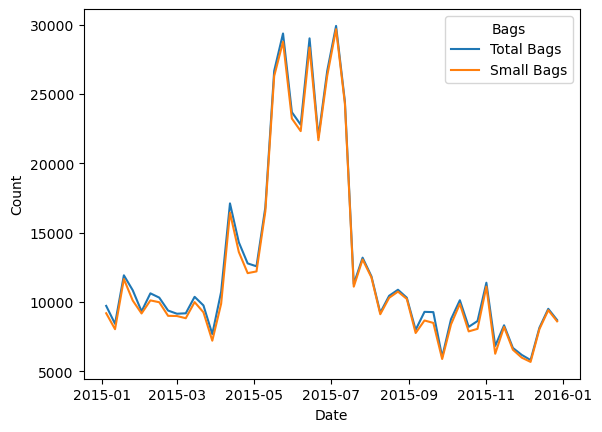

In [22]:
sb.lineplot(
    data=melted_df,
    x="Date",
    y="Count",
    hue="Bags")

In [24]:
bin_labels = ['Poor', 'Modest', 'Good', 'Excellent']
df['Sales Volume'] = pd.qcut(
    df['Total Volume'],
    q=4,
    labels=bin_labels)

print(df.head(5))

   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region Sales Volume  
0  2015  Albany       Modest  
1  2015  Albany       Mo

<Axes: xlabel='Year', ylabel='count'>

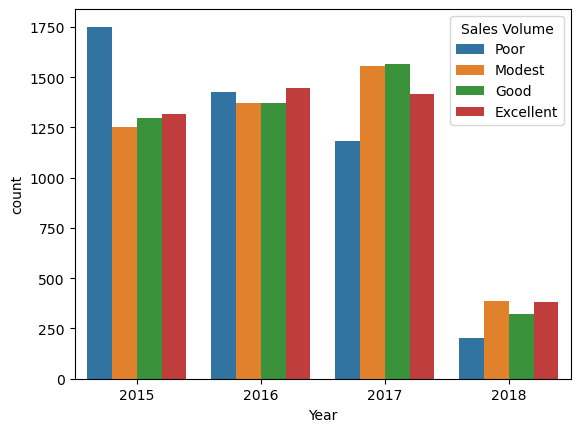

In [26]:
df['Year'] = df['Date'].dt.year

sb.countplot(
    data=df,
    x='Year',
    hue ='Sales Volume')

In [28]:
melted_bags_df = pd.melt(
    df,
    id_vars=["Date","Year"],
    value_vars=["Small Bags", "Large Bags", "XLarge Bags"],
    var_name="Bags",
    value_name="Count")

print(melted_bags_df.head())

        Date  Year        Bags    Count
0 2015-12-27  2015  Small Bags  8603.62
1 2015-12-20  2015  Small Bags  9408.07
2 2015-12-13  2015  Small Bags  8042.21
3 2015-12-06  2015  Small Bags  5677.40
4 2015-11-29  2015  Small Bags  5986.26


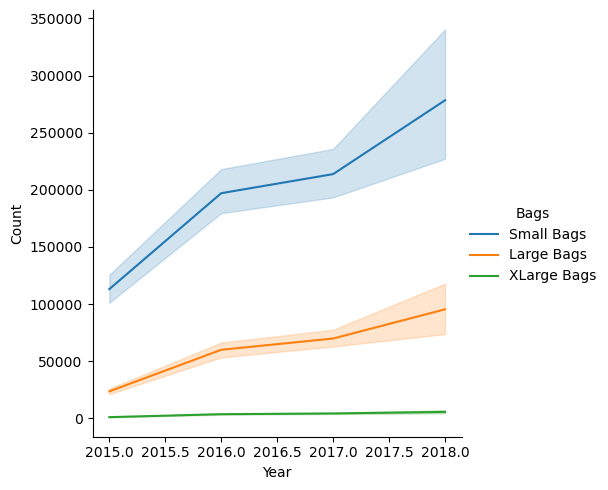

In [30]:
sb.relplot(
    kind="line",
    data=melted_bags_df,
    x="Year",
    y="Count",
    hue="Bags")

In [32]:
total_counts = melted_bags_df.groupby('Bags')['Count'].sum()
print(total_counts)

Bags
Large Bags     9.916158e+08
Small Bags     3.324871e+09
XLarge Bags    5.668918e+07
Name: Count, dtype: float64


## Bag Size Analysis

Based on the data given, the bag size that sells the best are Small Bags with a total of: 3,324,871,000 bags.